In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import scipy.interpolate
from scipy.ndimage import gaussian_filter
import tifffile
import seaborn as sns

from IPython.display import HTML
import matplotlib.animation as animation
from tqdm.notebook import tqdm, trange
from scipy.optimize import curve_fit
#import gaussian
from skimage.filters import gaussian
from scipy.interpolate import RectBivariateSpline
from PIL import Image
import itertools



In [3]:

PROJECT_PATH = 'C:/Users/amityu/DataspellProjects/gel_sheets/'
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
#movie = 'Control'
#movie = '130721'
#movie ='140721'
#movie ='150721'
#movie ='100621'
movie ='130721_CCA60_RAW'
ADD_PATH = os.path.join(PROJECT_PATH, "add_data/")


MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'

In [7]:
gel = np.load(MOVIE_PATH + 'np/gel_norm.npy')

In [14]:
membrane = (np.load(MOVIE_PATH + 'np/membrane.npy')+5).astype(int)
surface = (np.load(MOVIE_PATH + 'np/height.npy')-3).astype(int)

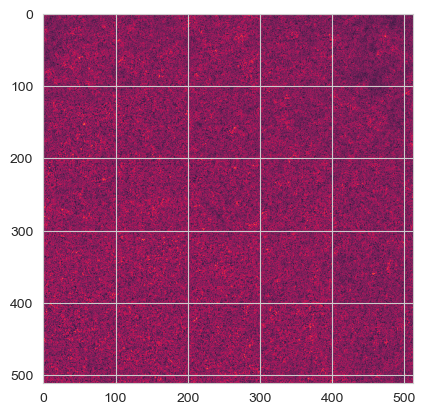

In [43]:
surface[surface>=gel.shape[1]] = gel.shape[1]-1
intensity = np.zeros(surface.shape)

for t,i,j in itertools.product(range(gel.shape[0]),range(gel.shape[2]), range(gel.shape[3])):
    intensity[t,i,j] = gel[t, membrane[t,i,j]  ,i,j]

plt.imshow(intensity[10])
plt.show()

In [44]:
#make animation for intensity with imshow and colorbar, and save it

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_title('Intensity')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
ax.set_xlim(0, intensity.shape[2])
ax.set_ylim(0, intensity.shape[1])

im = ax.imshow(intensity[0], cmap='jet', vmin=0, vmax=np.nanmax(intensity))
fig.colorbar(im)
def animate(i):
    im.set_data(intensity[i])
    ax.set_title('Intensity at t = ' + str(i))
    return im

ani = animation.FuncAnimation(fig, animate, frames=intensity.shape[0], interval=1000, blit=False)
ani.save(GRAPH_PATH + 'correlation/plate_intensity/' +movie + 'membrane_intensity.mp4', writer='ffmpeg', fps=1)
plt.close()


In [49]:
y = 256
membrane_intensity = np.zeros(membrane.shape)
surface_intensity = np.zeros(surface.shape)
for t  in range(len(gel)):
    membrane_intensity[t] = gel[t, membrane[t], np.arange(gel.shape[2]), np.arange(gel.shape[3])]
    surface_intensity[t] = gel[t, surface[t], np.arange(gel.shape[2]), np.arange(gel.shape[3])]

In [0]:
membrane_intensity = gaussian_filter(membrane_intensity, sigma=3)
surface_intensity = gaussian_filter(surface_intensity, sigma=3)

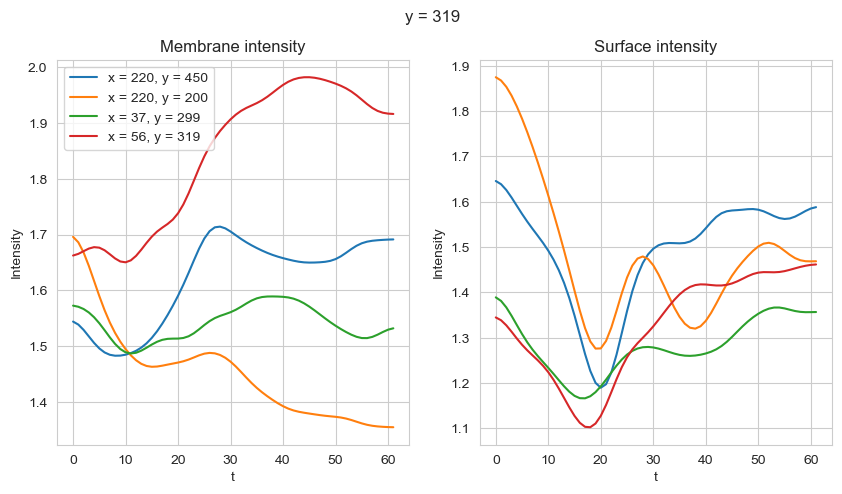

In [80]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
X= [220,220 ,37,56]
Y = [450,200,299,319]
for x,y in zip(X, Y):
    ax1.plot(membrane_intensity[:, y, x], label='x = ' + str(x) + ', y = ' + str(y))
    ax2.plot(surface_intensity[:, y, x], label='x = ' + str(x) + ', y = ' + str(y))
ax1.set_title('Membrane intensity')
ax2.set_title('Surface intensity')
ax1.set_xlabel('t')
ax2.set_xlabel('t')
ax1.set_ylabel('Intensity')
ax2.set_ylabel('Intensity')
ax1.legend()
plt.suptitle('y = ' + str(y))
plt.show()



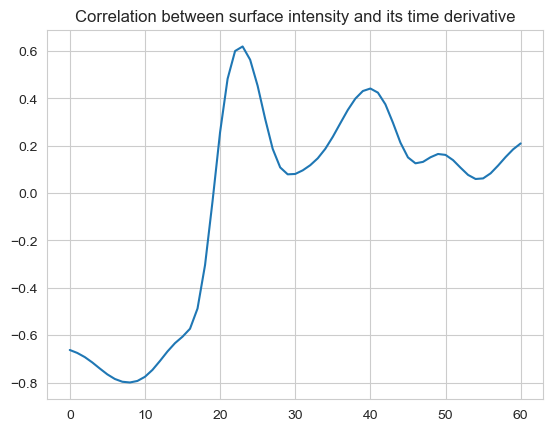

In [88]:
from scipy.stats import mannwhitneyu

surface_intensity_der = surface_intensity[1:] - surface_intensity[:-1]
c = np.zeros(len(surface_intensity_der))
for t in range(len(surface_intensity_der)):
    c[t] = np.corrcoef(surface_intensity_der[t].flatten(), surface_intensity[t].flatten())[0,1]
plt.plot(c)
plt.title('Correlation between surface intensity and its time derivative')
plt.show()


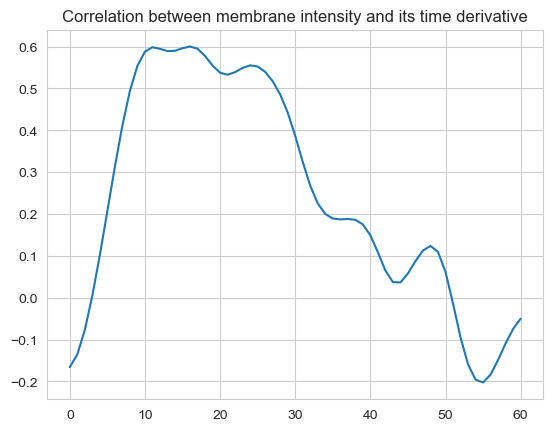

In [89]:

membrane_intensity_der = membrane_intensity[1:] - membrane_intensity[:-1]
c = np.zeros(len(surface_intensity_der))
for t in range(len(surface_intensity_der)):
    c[t] = np.corrcoef(membrane_intensity_der[t].flatten(), membrane_intensity[t].flatten())[0,1]
plt.plot(c)
plt.title('Correlation between membrane intensity and its time derivative')
plt.show()


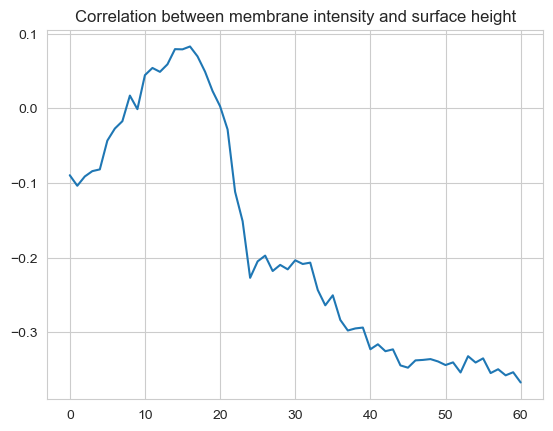

In [92]:
#correlation bettwen membrane intensity and surface
c = np.zeros(len(surface_intensity_der))
for t in range(len(surface_intensity_der)):
    c[t] = np.corrcoef(membrane_intensity[t].flatten(), surface [t].flatten())[0,1]
plt.plot(c)
plt.title('Correlation between membrane intensity and surface height')
plt.show()

